# Content List

1. Data Import
2. Data Cleaning & PII Handling
3. Region Creation
4. Spending & Activity Flags
5. Customer Profiling
6. Aggregations
7. Visualizations
8. Data Export

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

C:\Users\nikik\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
path = r'C:\Users\nikik\17-12-2025 Instacart Basket Analysis'

In [3]:
# importing the merged version of data from ex 4.9
df_final_dataframe = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'dataframe_new.pkl'))

In [4]:
df_final_dataframe.head()

,order_id,user_id,order_hour_of_day,prices,loyalty_flag,department_id,product_name,product_id,First Name,Surname,gender,state,age,date_joined,n_dependents,family_status,income
0,3139998,138,11,5.8,Regular customer,19,Chocolate Sandwich Cookies,1,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1977647,138,17,5.8,Regular customer,19,Chocolate Sandwich Cookies,1,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,389851,709,21,5.8,New customer,19,Chocolate Sandwich Cookies,1,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,652770,764,13,5.8,New customer,19,Chocolate Sandwich Cookies,1,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1813452,764,17,5.8,New customer,19,Chocolate Sandwich Cookies,1,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308


In [5]:
df_final_dataframe.shape

(32404859, 17)

In [6]:
df_final_dataframe.columns

Index(['order_id', 'user_id', 'order_hour_of_day', 'prices', 'loyalty_flag',
       'department_id', 'product_name', 'product_id', 'First Name', 'Surname',
       'gender', 'state', 'age', 'date_joined', 'n_dependents',
       'family_status', 'income'],
      dtype='object')

In [7]:
# creating spending flag
df_final_dataframe['spending_flag'] = pd.cut(df_final_dataframe['income'],bins=[0, 40000, 80000, df_final_dataframe['income'].max()],labels=['Low spender', 'Medium spender', 'High spender'])

In [8]:
df_final_dataframe.columns

Index(['order_id', 'user_id', 'order_hour_of_day', 'prices', 'loyalty_flag',
       'department_id', 'product_name', 'product_id', 'First Name', 'Surname',
       'gender', 'state', 'age', 'date_joined', 'n_dependents',
       'family_status', 'income', 'spending_flag'],
      dtype='object')

# 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

- The dataset combines order, product, and customer-level information.

- It includes personally identifiable information (PII) such as first name, surname, age, income, and family status.

- Direct identifiers (first name and surname) were removed to protect customer privacy.

- No direct contact details (e.g., address, phone number, email) are present.

- Analysis is performed at an aggregated level to ensure individuals cannot be identified.

In [9]:
df_final_dataframe.columns

Index(['order_id', 'user_id', 'order_hour_of_day', 'prices', 'loyalty_flag',
       'department_id', 'product_name', 'product_id', 'First Name', 'Surname',
       'gender', 'state', 'age', 'date_joined', 'n_dependents',
       'family_status', 'income', 'spending_flag'],
      dtype='object')

In [10]:
# dropping PII data such as first name and surname
df_final_dataframe.drop(columns = ['First Name', 'Surname'], axis = 1, inplace = True)

In [11]:
# checking output
df_final_dataframe.columns

Index(['order_id', 'user_id', 'order_hour_of_day', 'prices', 'loyalty_flag',
       'department_id', 'product_name', 'product_id', 'gender', 'state', 'age',
       'date_joined', 'n_dependents', 'family_status', 'income',
       'spending_flag'],
      dtype='object')

In [12]:
# Define the regions (already have this)
northeast = ["Connecticut", "Maine", "Massachusetts", "New Hampshire", 
             "Rhode Island", "Vermont", "New Jersey", "New York", "Pennsylvania"]
midwest = ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", 
           "Iowa", "Kansas", "Minnesota", "Missouri", 
           "Nebraska", "North Dakota", "South Dakota"]
south = ["Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", 
         "Virginia", "District of Columbia", "West Virginia", "Alabama", "Kentucky", 
         "Mississippi", "Tennessee", "Arkansas", "Louisiana", "Oklahoma", "Texas"]
west = ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", 
        "Utah", "Wyoming", "Alaska", "California", "Hawaii", "Oregon", "Washington"]


In [13]:
# Function to map state to region
def get_region(state):
    if state in northeast:
        return "Northeast"
    elif state in midwest:
        return "Midwest"
    elif state in south:
        return "South"
    elif state in west:
        return "West"
    else:
        return "Other"  # just in case

In [14]:
# Create the Region column
df_final_dataframe['Region'] = df_final_dataframe['state'].apply(get_region)

In [15]:
 # Check result
df_final_dataframe[['state','Region']].head()

,state,Region
0,Minnesota,Midwest
1,Minnesota,Midwest
2,Vermont,Northeast
3,Wisconsin,Midwest
4,Wisconsin,Midwest


In [16]:
df_final_dataframe['Region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [17]:
df_final_dataframe.head()

,order_id,user_id,order_hour_of_day,prices,loyalty_flag,department_id,product_name,product_id,gender,state,age,date_joined,n_dependents,family_status,income,spending_flag,Region
0,3139998,138,11,5.8,Regular customer,19,Chocolate Sandwich Cookies,1,Male,Minnesota,81,8/1/2019,1,married,49620,Medium spender,Midwest
1,1977647,138,17,5.8,Regular customer,19,Chocolate Sandwich Cookies,1,Male,Minnesota,81,8/1/2019,1,married,49620,Medium spender,Midwest
2,389851,709,21,5.8,New customer,19,Chocolate Sandwich Cookies,1,Female,Vermont,66,6/16/2018,2,married,158302,High spender,Northeast
3,652770,764,13,5.8,New customer,19,Chocolate Sandwich Cookies,1,Female,Wisconsin,40,2/9/2020,3,married,31308,Low spender,Midwest
4,1813452,764,17,5.8,New customer,19,Chocolate Sandwich Cookies,1,Female,Wisconsin,40,2/9/2020,3,married,31308,Low spender,Midwest


In [18]:
df_final_dataframe.columns

Index(['order_id', 'user_id', 'order_hour_of_day', 'prices', 'loyalty_flag',
       'department_id', 'product_name', 'product_id', 'gender', 'state', 'age',
       'date_joined', 'n_dependents', 'family_status', 'income',
       'spending_flag', 'Region'],
      dtype='object')

# Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [19]:
pd.crosstab(df_final_dataframe['Region'], df_final_dataframe['spending_flag'], dropna = False)
    

spending_flag,Low spender,Medium spender,High spender
Region,,,
Midwest,401040,2282995,4913290
Northeast,303379,1704015,3715342
South,590337,3306976,6894572
West,432442,2552887,5307584


In [20]:
region_spending = pd.crosstab(df_final_dataframe['Region'], df_final_dataframe['spending_flag'], normalize='index') * 100


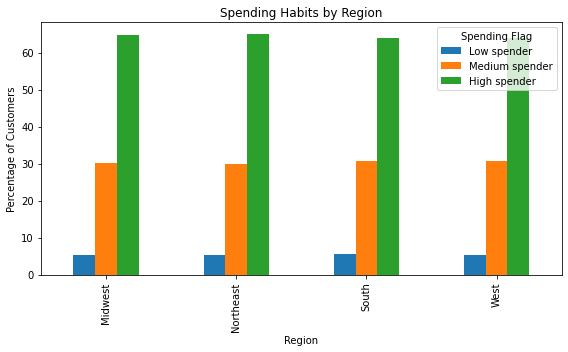

In [21]:
# Plot
ax = region_spending.plot(kind='bar',stacked=False, figsize=(8, 5))

# Labels and title
plt.ylabel('Percentage of Customers')
plt.xlabel('Region')
plt.title('Spending Habits by Region')
plt.legend(title='Spending Flag')

plt.tight_layout()
plt.show()

In [22]:
# exporting visualizations
fig = ax.get_figure()
fig.savefig(os.path.join(path, 'Analysis', 'Visualization Files', 'spending_by_region.png'),dpi=300,bbox_inches='tight')

In [23]:
# count orders per user
user_order_counts = (df_final_dataframe[['user_id', 'order_id']].drop_duplicates().groupby('user_id').size().reset_index(name='total_orders'))


In [24]:
#Select active users (>=5 orders)
active_users = user_order_counts.loc[user_order_counts['total_orders'] >= 5, 'user_id']


In [25]:
#Filter main dataframe
df_active = df_final_dataframe[df_final_dataframe['user_id'].isin(active_users)]


In [27]:
df_active.head()

,order_id,user_id,order_hour_of_day,prices,loyalty_flag,department_id,product_name,product_id,gender,state,age,date_joined,n_dependents,family_status,income,spending_flag,Region
0,3139998,138,11,5.8,Regular customer,19,Chocolate Sandwich Cookies,1,Male,Minnesota,81,8/1/2019,1,married,49620,Medium spender,Midwest
1,1977647,138,17,5.8,Regular customer,19,Chocolate Sandwich Cookies,1,Male,Minnesota,81,8/1/2019,1,married,49620,Medium spender,Midwest
2,389851,709,21,5.8,New customer,19,Chocolate Sandwich Cookies,1,Female,Vermont,66,6/16/2018,2,married,158302,High spender,Northeast
5,1701441,777,7,5.8,Regular customer,19,Chocolate Sandwich Cookies,1,Female,Hawaii,51,1/4/2019,2,married,57797,Medium spender,West
6,1871483,825,14,5.8,New customer,19,Chocolate Sandwich Cookies,1,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,Low spender,South


In [28]:
df_active.shape

(30964518, 17)

In [32]:
df_active.columns

Index(['order_id', 'user_id', 'order_hour_of_day', 'prices', 'loyalty_flag',
       'department_id', 'product_name', 'product_id', 'gender', 'state', 'age',
       'date_joined', 'n_dependents', 'family_status', 'income',
       'spending_flag', 'Region'],
      dtype='object')

# 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

In [33]:
# create customer level dataframe
df_customers = (df_active.groupby('user_id').agg({'age': 'first','income': 'first','n_dependents': 'first','Region': 'first','order_id': 'nunique','prices': 'mean' }).reset_index())

In [34]:
# customer profiling
df_customers['customer_profile'] = 'Other'

df_customers.loc[df_customers['age'] > 60, 'customer_profile'] = 'Retired/Old Adult'

df_customers.loc[
    (df_customers['age'] < 30) &
    (df_customers['n_dependents'] == 0),
    'customer_profile'
] = 'Young Adult'

df_customers.loc[
    (df_customers['age'].between(25, 40)) &
    (df_customers['n_dependents'] > 0),
    'customer_profile'
] = 'Young Parent'
df_customers.loc[
    (df_customers['income'] > 100000) &
    (df_customers['n_dependents'] <= 1),
    'customer_profile'
] = 'Wealthy Professional'

df_customers.loc[
    (df_customers['income'] < 60000) &
    (df_customers['n_dependents'] >= 2),
    'customer_profile'
] = 'Budget-Conscious Family'

In [35]:
df_customers['customer_profile'].value_counts()

Other                      46792
Wealthy Professional       35069
Retired/Old Adult          31443
Young Parent               22509
Budget-Conscious Family    19328
Young Adult                 7486
Name: customer_profile, dtype: int64

# 6. Create an appropriate visualization to show the distribution of profiles.

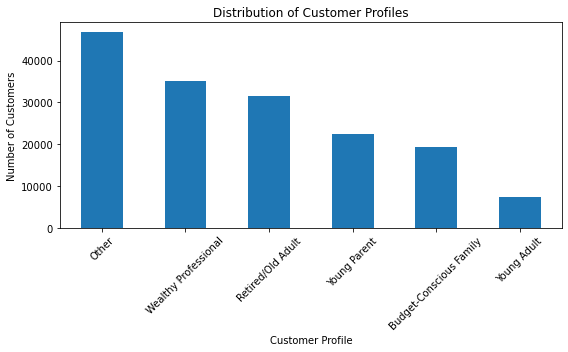

In [36]:
profile_counts = df_customers['customer_profile'].value_counts()

ax = profile_counts.plot(
    kind='bar',
    figsize=(8, 5)
)

plt.title('Distribution of Customer Profiles')
plt.xlabel('Customer Profile')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
bar_customer_profile = ax.get_figure()

In [38]:
bar_customer_profile.savefig(os.path.join(path, 'Analysis', 'Visualization Files', 'distribution_of_customers.png'),dpi=300,bbox_inches='tight')

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [39]:
profile_agg = (df_customers.groupby('customer_profile').agg({'order_id': ['min', 'mean', 'max'],'prices': ['min', 'mean', 'max']}))

In [40]:
# check output
profile_agg.columns = ['orders_min', 'orders_mean', 'orders_max','price_min', 'price_mean', 'price_max']

profile_agg

,orders_min,orders_mean,orders_max,price_min,price_mean,price_max
customer_profile,,,,,,
Budget-Conscious Family,5,17.668150,99,1.000000,6.807003,20.078024
Other,5,18.928770,99,1.000000,11.315177,10209.987755
Retired/Old Adult,5,18.971027,99,1.300000,11.521081,7414.485185
Wealthy Professional,5,19.218455,99,7.000000,18.346425,15006.940000
Young Adult,5,18.515496,99,2.100000,7.998688,1575.413816
Young Parent,5,19.017771,99,1.773333,12.402569,4060.500676


In [41]:
# compare customers profiles by region
profile_region = (pd.crosstab(df_customers['customer_profile'],df_customers['Region'],normalize='index') * 100)

profile_region

Region,Midwest,Northeast,South,West
customer_profile,,,,
Budget-Conscious Family,23.489238,17.358237,33.552359,25.600166
Other,23.826723,17.364079,33.217217,25.591982
Retired/Old Adult,23.518748,17.456986,33.202939,25.821327
Wealthy Professional,23.870085,17.764978,33.106162,25.258776
Young Adult,22.628907,18.514561,33.823137,25.033396
Young Parent,23.217380,17.748456,33.679861,25.354303


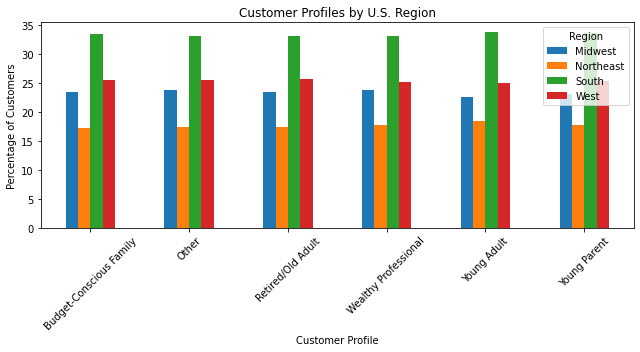

In [42]:
ax = profile_region.plot(
    kind='bar',
    figsize=(9, 5)
)

plt.title('Customer Profiles by U.S. Region')
plt.ylabel('Percentage of Customers')
plt.xlabel('Customer Profile')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [43]:
# compare profiles with departments
dominant_dept = (
    df_active
    .groupby(['user_id', 'department_id'])
    .size()
    .reset_index(name='count')
    .sort_values(['user_id', 'count'], ascending=[True, False])
    .drop_duplicates('user_id')
)

df_customers = df_customers.merge(
    dominant_dept[['user_id', 'department_id']],
    on='user_id',
    how='left'
)

In [44]:
# cross profile
profile_department = (pd.crosstab(df_customers['customer_profile'],df_customers['department_id'],normalize='index') * 100)

profile_department

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
customer_profile,,,,,,,,,,,,,,,,,,,,,
Budget-Conscious Family,4.842715,0.020695,0.517384,48.033940,1.081333,0.031043,11.656664,0.155215,0.212127,0.020695,...,0.072434,1.381416,0.424255,0.341474,12.458609,1.598717,0.517384,15.743998,0.424255,0.005174
Other,4.823474,0.004274,0.399641,60.506069,1.030091,0.023508,7.950077,0.252180,0.177381,0.002137,...,0.194478,1.406223,0.239357,0.329116,14.711917,1.301505,0.666781,5.197470,0.297059,0.004274
Retired/Old Adult,4.932735,0.006361,0.397545,59.962472,0.919123,0.025443,8.030404,0.209904,0.222625,0.003180,...,0.178100,1.482047,0.244888,0.286232,15.027192,1.383456,0.591547,5.343002,0.305314,0.006361
Wealthy Professional,4.753486,0.005703,0.404916,63.312327,0.941002,0.034218,7.091733,0.250934,0.182497,0.002852,...,0.185349,1.308848,0.265191,0.367846,15.338333,1.254669,0.624483,2.865779,0.285152,0.000000
Young Adult,4.461662,0.000000,0.360673,59.845044,0.935079,0.053433,8.335560,0.227091,0.227091,0.013358,...,0.200374,1.415976,0.333957,0.333957,14.360139,1.269036,0.494256,6.305103,0.253807,0.000000
Young Parent,4.784753,0.013328,0.453152,61.446532,0.972944,0.031099,7.388156,0.204363,0.213248,0.000000,...,0.191035,1.328358,0.248789,0.390955,15.575992,1.257275,0.568661,4.216091,0.239904,0.008885


In [46]:
fig = ax.get_figure()
fig.savefig(os.path.join(path, 'Analysis', 'Visualization Files', 'profiles_by_region.png'),dpi=300,bbox_inches='tight')